# HW #7 Neural Networks

In this HW, we'll be exploring a visual proof of the universal approximation theorem and building (from scratch) a neural network that will approximate a pretty ridiculous function.

Head over to [this site](http://neuralnetworksanddeeplearning.com/chap4.html) and read from the beginning of the page until the "Many Input Variables" section. (You do not need to read the "Many Input Variables" section and beyond but are certainly welcome to do so!) You'll read the introduction, the "Two Caveats" section, and the "Universality with One Input and One Output" section.

Your answers to problems 1-5 should come from directly this reading.

**Problem 1**: Summarize the Universal Approximation Theorem. (Don't copy it; use your own words!)

### 1. As in the digital world NAND gates are said to be universal approximators as they can compute any function by adjusting weights. <br/>
### 2. Neural network with one hidden layer can be used to approximate any continuous function by adjusting the no. of neurons used in that layer (the get the best approximation we can use 2n+1 neurons in hidden layer , where n is no. of inputs) to any desired accuracy.<br/>
### 3. And as said by the author the combination of powerful algorithms for learning functions and universality(to learn anything by adjusting the parameters like neurons, etc.) neural networks can be tuned for any arbitrary input and still give output with very little error.


**Problem 2**: Summarize the two caveats the author uses to describe the statement "a neural network can compute any function."

### The 2 caveats are:<br/>
###  1. Universal approximator means it can only approximate the function's output but doesn't compute the exactly same function output without any error. As we increase the number of neurons used in the layer and increase the number of training examples, the neural network can improve on approximation made for the function's output. <br/>
###  2. The neural network can predict approximate output's for continuous function's , it cannot perform as per expectations on discrete or discontinuous functions, As neural network cannot capture sudden changes in the function. 

**Problem 3:** For a sigmoidal activation function to closely resemble a step function, how would you describe the value of $w$? What constraints exist on the value of $b$? How do we calculate $s$? What does the value of $s$ indicate?

Try playing around with the applets on [this site](http://neuralnetworksanddeeplearning.com/chap4.html) to test how different parts of the perceptron affect the output. This should be helpful in answering the questions above.

### 1. The value of w should be set to very high eg:- 1000. 
### For the function((1/(1+e^-x)) - sigmoid function), As Limit x -> 0 function value is equal to 1, Limit x -> 1 function value is equal to 0, where x = w*input + b.
### 2. As the bias(b) increases the graph moves to the left and as the bias decreases the graph moves to the right without any effect in shape , as bias is independent of 'x' value. By adjusting the bias we can adjust the starting position of step function.<br/>
### As per my understanding, when 'w' is a larger number , b value should be a negative number to see a step function , and by adjusting the value of 'b' we can adjust the step starting point.
### 3. s is directly proportional to bias and inversely proportional to weight.
### We calculate 's' by substituting the values of 'b' and 'w' in the following formula, 
### s = -bias/weight.
### 4. The value of 's' indicate the position of step.


**Problem 4**: When the author wants us to approximate $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ with a neural network, the function on the applet where we manipulate the values of $h_i$ is not $f(x)$. It's a different function. What is this function, and where on the feedforward Neural Network is can the vaule of this function be collected?

### The function is the inverse function calculated by inversing the sigmoid function and multiplied with actual function. The weighted output of the hidden layer should correspond to that value.
### The function is: $\sigma^{-1}\circ f(x)$
### As per my understanding, if we pass the above calculated function value to the final sigmoid gate , then the sigmoid and it's inverse cancels out and we will be left with the function's output which is close approximate to f(x). As we are trying to minimize the average deviation between the goal function and the actual function.

### Where on the network is value collected? It is the weighted output of the hidden layer.


**Problem 5**: The author asks you to find values of $h_i$ that make your neural network closely approximate $\sigma^{-1}\circ f(x)$. Record your values of $h_i$ here and your best "average deviation" score. Let's name the $h$s from top to bottom on the graph as $h_1$, $h_2$ ,,,, $h_5$,

### h1 = -1.2, 
### h2 = -1.4, 
### h3= -0.3, 
### h4=-0.9, 
### h5=1.3 , 
### Best Average Deviation = 0.38

**Problem 6**: Build the neural network from your work in Problem 5 here with MLPClassifier.

A few things to keep in mind:
* How many inputs are there? 
* How many outputs are there?
* How many neurons are in the hidden layer?


In [0]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [0]:
X = pd.DataFrame(np.linspace(0,1,1000))
y = pd.DataFrame(0.2 + 0.4 * X**2 + 0.3 * X * np.sin(15*X) + 0.05 * np.cos(50*X))


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# activation = relu, solver function = adam
mlp = MLPRegressor(hidden_layer_sizes=10, learning_rate_init=0.09, random_state=0)
mlp.fit(X_train,y_train)
accuracy = mlp.score(X_test,y_test)
y_hat = mlp.predict(X)
MSE = mean_squared_error(y, y_hat)
print("Accuracy: {}, Mean Squared Error: {}".format(accuracy,MSE))

Accuracy: 0.8330016728356665, Mean Squared Error: 0.008206003447028449


**Problem 7**: Once you've built the neural network with the structure described in Problem 6, use `np.linspace` to generate 1000 values of $x$ between 0 and 1 and estimate the performance of your neural network using mean squared error.

Recall that mean squared error(MSE) is given by:

$$
\frac{1}{n}\sum_{i=1}^n (\hat{y}-y)^2
$$


* Your $\hat{y}$ in this case are your predicted values from your neural network for each of the $x$ that you generated using `np.linspace`. Make sure to take into account the final activation function!
* Your $y$ values are the actual observed values of $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ for each of the $x$ that you generated using `np.linspace`.
* Use  [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) for this work.
* Plot  $f(x)$ curve overlapped with the curve predicted by your trained Neural Networks for x between 0 and 1
* Try different learning rates

In [0]:
y_hat = mlp.predict(X)

MSE = mean_squared_error(y,y_hat)
print(MSE)

0.008206003447028449


In [0]:
def plot_hyper_param_plots(x, y, y_hat, xlabel):
    plt.plot(x, y, label='actual')
    plt.plot(x, y_hat, label='predicted')
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy')
    plt.legend(loc='upper left')

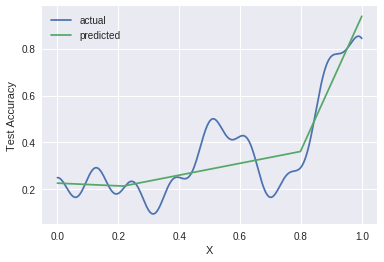

In [0]:
plot_hyper_param_plots(X, y, y_hat, "X")

In [0]:
MSE_list = {}
for alpha in np.arange(0.001,0.3,0.01):
  mlp = MLPRegressor(hidden_layer_sizes=10,activation='relu', learning_rate_init=alpha, random_state=0)
  mlp.fit(X_train,y_train)
  accuracy = mlp.score(X_test,y_test)
  y_hat = mlp.predict(X)
  MSE = mean_squared_error(y, y_hat)
  MSE_list[alpha]= MSE
  print("The learning rate is : {} and the MSE is : {}".format(round(alpha,3) , round(MSE,4)))
print()
print(" The minimum value for MSE is at learning rate: ", min(MSE_list.items(), key=lambda x: x[1]) )

The learning rate is : 0.001 and the MSE is : 0.0206
The learning rate is : 0.011 and the MSE is : 0.0192
The learning rate is : 0.021 and the MSE is : 0.0191
The learning rate is : 0.031 and the MSE is : 0.019
The learning rate is : 0.041 and the MSE is : 0.0187
The learning rate is : 0.051 and the MSE is : 0.0188
The learning rate is : 0.061 and the MSE is : 0.0183
The learning rate is : 0.071 and the MSE is : 0.0083
The learning rate is : 0.081 and the MSE is : 0.0084
The learning rate is : 0.091 and the MSE is : 0.0082
The learning rate is : 0.101 and the MSE is : 0.0084
The learning rate is : 0.111 and the MSE is : 0.0083
The learning rate is : 0.121 and the MSE is : 0.0086
The learning rate is : 0.131 and the MSE is : 0.0178
The learning rate is : 0.141 and the MSE is : 0.0201
The learning rate is : 0.151 and the MSE is : 0.0201
The learning rate is : 0.161 and the MSE is : 0.0201
The learning rate is : 0.171 and the MSE is : 0.02
The learning rate is : 0.181 and the MSE is : 0.0

**Problem 8**: Suppose you wanted to increase the performance of this neural network. How might you go about doing so?
* You try different number of hidden layers and different number of neurons in each hidden layer.
* Report your best Neural Network structure and the minimum MSE you can get.

In [0]:
# functions to test different hidden layers and learning rates
def train_mlp(units, activation='relu', lr=0.07, batch_size=200,loss_curve=False):
    
    mlp = MLPRegressor(hidden_layer_sizes=units, activation=activation, batch_size=batch_size, momentum=0.0, learning_rate_init=lr, random_state=0)
    
    mlp.fit(X_train, y_train)
    accuracy = mlp.score(X_test,y_test)
# #     print(mlp.get_params())
#     if loss_curve:
#         return mlp.loss_curve_, accuracy
    
    y_hat = mlp.predict(X)

    MSE = mean_squared_error(y,y_hat)
    
    return MSE


In [0]:
for units in range(5,110,5):
  print("No. of neurons in one hidden layer are: {} and MSE is {}".format(units, round(train_mlp(units),4)))

No. of neurons in one hidden layer are: 5 and MSE is 0.0086
No. of neurons in one hidden layer are: 10 and MSE is 0.0083
No. of neurons in one hidden layer are: 15 and MSE is 0.0082
No. of neurons in one hidden layer are: 20 and MSE is 0.0195
No. of neurons in one hidden layer are: 25 and MSE is 0.02
No. of neurons in one hidden layer are: 30 and MSE is 0.018
No. of neurons in one hidden layer are: 35 and MSE is 0.0172
No. of neurons in one hidden layer are: 40 and MSE is 0.0082
No. of neurons in one hidden layer are: 45 and MSE is 0.0082
No. of neurons in one hidden layer are: 50 and MSE is 0.0082
No. of neurons in one hidden layer are: 55 and MSE is 0.0078
No. of neurons in one hidden layer are: 60 and MSE is 0.0166
No. of neurons in one hidden layer are: 65 and MSE is 0.0165
No. of neurons in one hidden layer are: 70 and MSE is 0.017
No. of neurons in one hidden layer are: 75 and MSE is 0.0082
No. of neurons in one hidden layer are: 80 and MSE is 0.0168
No. of neurons in one hidden 

In [0]:
import itertools
for i,j in itertools.product(range(10,50,10), range(10,50,10)):
  units = i,j
  print("Number of Neurons: {} and MSE is {}".format(units,train_mlp(units)))
  


Number of Neurons: (10, 10) and MSE is 0.008131482417741687
Number of Neurons: (10, 20) and MSE is 0.008283015919445717
Number of Neurons: (10, 30) and MSE is 0.016819721803925207
Number of Neurons: (10, 40) and MSE is 0.016886932147283488
Number of Neurons: (20, 10) and MSE is 0.016584317063646187
Number of Neurons: (20, 20) and MSE is 0.01763867552836577
Number of Neurons: (20, 30) and MSE is 0.004002697053850932
Number of Neurons: (20, 40) and MSE is 0.016944640914849967
Number of Neurons: (30, 10) and MSE is 0.016767207693087465
Number of Neurons: (30, 20) and MSE is 0.01735054727147362
Number of Neurons: (30, 30) and MSE is 0.003337015963686106
Number of Neurons: (30, 40) and MSE is 0.017030044328483672
Number of Neurons: (40, 10) and MSE is 0.016797788746990883
Number of Neurons: (40, 20) and MSE is 0.0025675610626119975
Number of Neurons: (40, 30) and MSE is 0.007786395985114117
Number of Neurons: (40, 40) and MSE is 0.016883874757271575


In [0]:
num_hidden_units = range(5, 105, 5)
all_test_accuracy = []
for units in num_hidden_units: 
    MSE = train_mlp((units,))
    print ("Units: {}, MSE: {}".format(units, MSE))
    all_test_accuracy.append(MSE)

Units: 5, MSE: 0.008627715659812643
Units: 10, MSE: 0.008268088815815477
Units: 15, MSE: 0.008189517277398129
Units: 20, MSE: 0.019498840904076675
Units: 25, MSE: 0.020010487789750203
Units: 30, MSE: 0.01797301249956988
Units: 35, MSE: 0.017168688433507256
Units: 40, MSE: 0.00820602001227029
Units: 45, MSE: 0.008214649687012417
Units: 50, MSE: 0.008225787447225479
Units: 55, MSE: 0.007786107924159358
Units: 60, MSE: 0.01664534459149529
Units: 65, MSE: 0.016495153485915445
Units: 70, MSE: 0.017040012341672038
Units: 75, MSE: 0.008181800910463959
Units: 80, MSE: 0.016762002324302163
Units: 85, MSE: 0.008333458111615922
Units: 90, MSE: 0.01982755507601791
Units: 95, MSE: 0.013100597030426667
Units: 100, MSE: 0.008135555514288764


In [0]:
best_units = num_hidden_units[np.argmin(all_test_accuracy)]
best_depths = []

for depth in range(1, 11):
    MSE = train_mlp((best_units,)*depth)
    best_depths.append(MSE)
    print ("No. of Neurons: {} , Depth of the Network: {}, Mean Squared Error: {}".format(best_units,depth, MSE))

No. of Neurons: 55 , Depth of the Network: 1, Mean Squared Error: 0.007786107924159358
No. of Neurons: 55 , Depth of the Network: 2, Mean Squared Error: 0.016790081745546085
No. of Neurons: 55 , Depth of the Network: 3, Mean Squared Error: 0.04105211948164741
No. of Neurons: 55 , Depth of the Network: 4, Mean Squared Error: 0.008109640328754043
No. of Neurons: 55 , Depth of the Network: 5, Mean Squared Error: 0.00411228761899631
No. of Neurons: 55 , Depth of the Network: 6, Mean Squared Error: 0.0410178005162985
No. of Neurons: 55 , Depth of the Network: 7, Mean Squared Error: 0.04104591355364151
No. of Neurons: 55 , Depth of the Network: 8, Mean Squared Error: 0.04134471184117376
No. of Neurons: 55 , Depth of the Network: 9, Mean Squared Error: 0.04506295757181517
No. of Neurons: 55 , Depth of the Network: 10, Mean Squared Error: 0.04556403052280324


### I have tried different number of hidden layers and different number of neurons in each hidden layer.
### The best Neural Network structure and the minimum MSE :

### Number of Neurons: (20, 30) and MSE is 0.004002697053850932


